After [this blog](http://www.cleonis.nl/physics/phys256/least_action.php):

The calculation of the trajectory constraint to $0$ values at $t=-1$ and $t=1$ starts with an inverted parabola:

$$f(t) =-(t + 1) ( t - 1)$$

and the addition of a factor accounting for the $\epsilon$ deviations from such parabola:

$$f(t) =- (1 + \epsilon) (t + 1) ( t - 1)$$

The energy is calculated as kinetic energy and potential energy. The kinetic energy is calculated by first calculating the velocity as the derivative of $f(t):$

$$v(t) = - 2(1+ \epsilon)t$$

and the formula $E_k = \frac 1 2 mv^2.$ Assuming $m=1:$

$$E_k = 2(1 + \epsilon)^2t^2$$

Now for the potential energy, and rounding $g=2,$

$$E_p = -2 (1 + \epsilon) (t + 1) ( t - 1)$$

And the action as the integral for each type of energy:

$$S_k=\int_{-1}^1 E_k dt =  \int_{-1}^1 2(1 + \epsilon)^2t^2 dt = \frac 4 3 (1+\epsilon)^2$$

and

$$-S_p=-\int_{-1}^1 E_p dt =  \int_{-1}^1 2 (1 + \epsilon) (t + 1) ( t - 1) dt =- \frac 8 3 (1+\epsilon)$$


In [ ]:
t = seq(-1,1,0.001)
eps = seq(-.5,.5,0.001)
traj = matrix(,length(eps),length(t))
for (i in 1:length(eps)) traj[i,] <- -(1 + eps[i]) * (t + 1) * (t - 1)

In [ ]:
energy_k = matrix(,length(eps),length(t))
for(i in 1: length(eps)) energy_k[i,] <- 2 * (1 + eps[i])^2 * t^2
energy_p = matrix(,length(eps),length(t))
for(i in 1: length(eps)) energy_p[i,] <- -2 * (1 + eps[i])*(t+1)*(t-1)

In [ ]:
action = matrix(,length(eps),2)
for(i in 1: length(eps)){
  action[i,1] <- 4/3 * (1 + eps[i])^2
  action[i,2] <- -8/3 * (1 + eps[i])
}
total = rowSums(action)

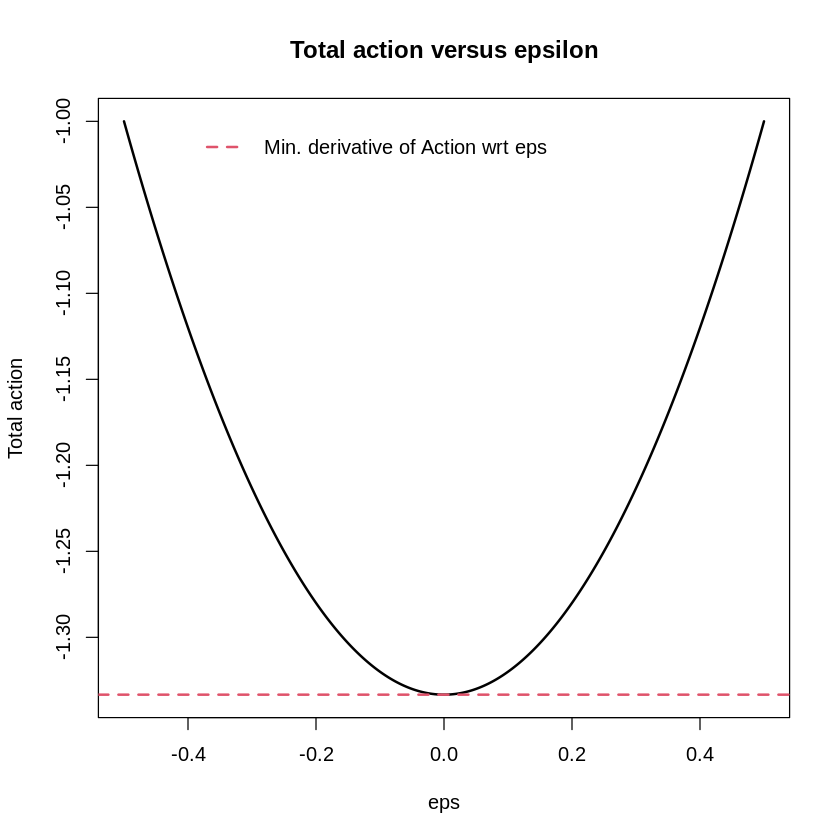

In [ ]:
plot(eps,total, main='Total action versus epsilon', type='l', lwd=2, ylab='Total action')
abline(h=min(total), col=2, lwd=2, lty=2)
legend(min(eps)+0.2*max(eps), max(total), 'Min. derivative of Action wrt eps', bty='n', lty=2, col=2, lwd=2)

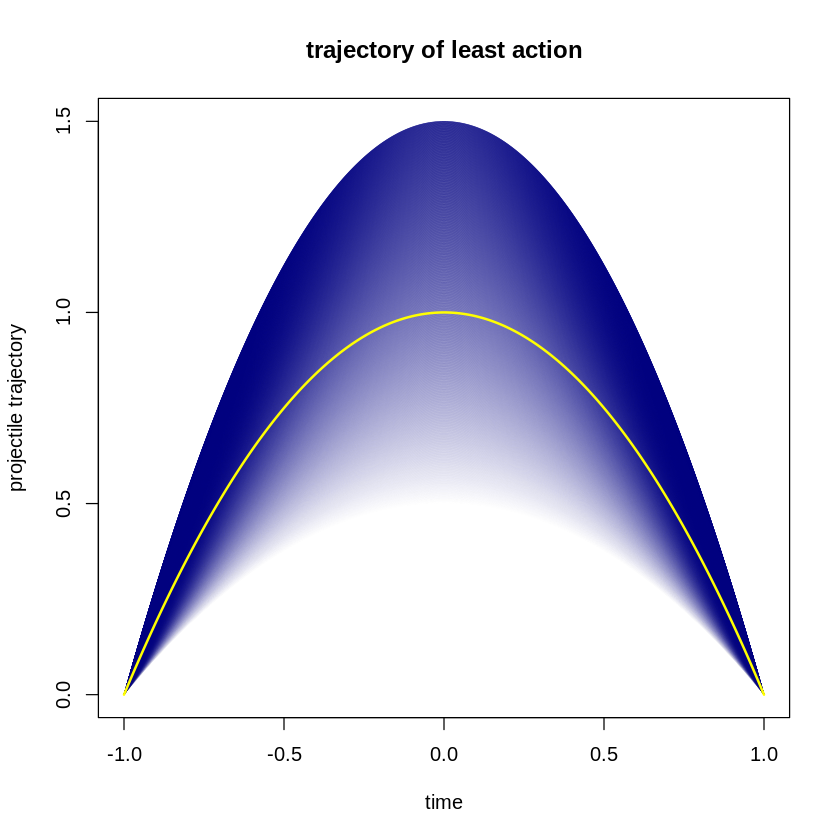

In [ ]:
plot(t, traj[1,], type='l', col='white', lwd=1, ylim=c(0,max(traj)), ylab='projectile trajectory', xlab='time', main='trajectory of least action')
for (i in 2: (length(eps))) lines(t, traj[i,], col=rgb(0,0,0.5,i/(length(eps))), lwd=.4)
lines(t, traj[which.min(total),], col='yellow',lwd=2)

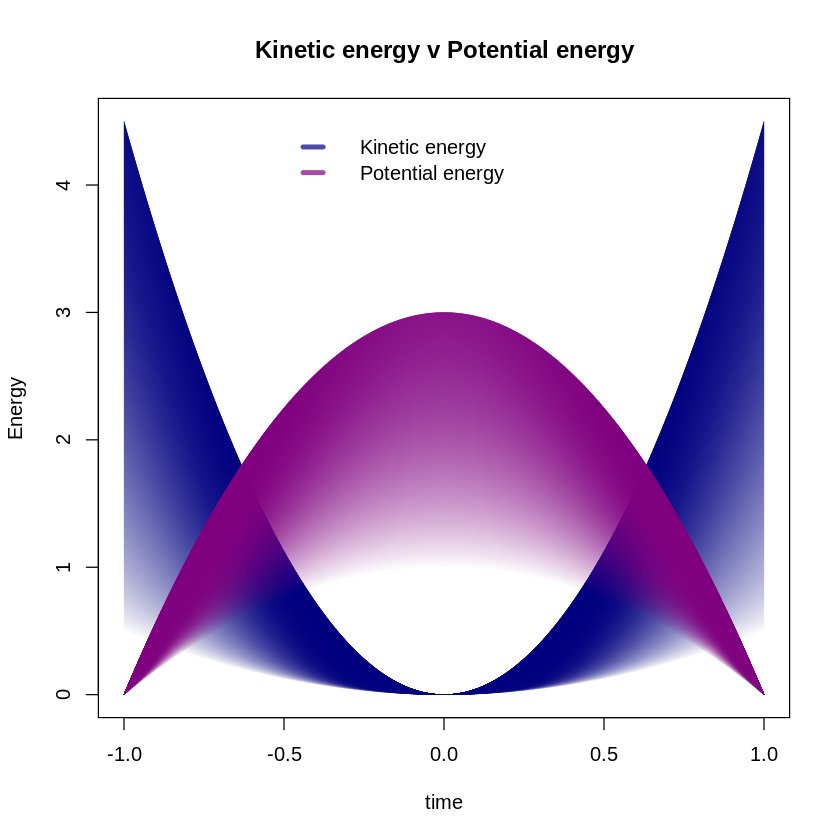

In [ ]:
plot(t, energy_k[1,], type='l', col='white', lwd=1, ylim=c(min(energy_p),max(energy_k)), ylab='Energy', xlab='time',
         main='Kinetic energy v Potential energy')
for (i in 2: (length(eps))) lines(t, energy_k[i,], col=rgb(0,0,0.5,i/(length(eps))), lwd=.4)
for (i in 2: (length(eps))) lines(t, energy_p[i,], col=rgb(0.5,0,0.5,i/(length(eps))), lwd=.4)
legend(-.5,4.5,c('Kinetic energy','Potential energy'), bty='n', lty=2, col=c(rgb(0,0,0.5,.7), rgb(0.5,0,0.5,.7)), lwd=4)

In [ ]:
delta = matrix(,length(eps),length(t))
for (i in 1: length(eps)) delta[i,] <- energy_k[i,] - energy_p[i,]

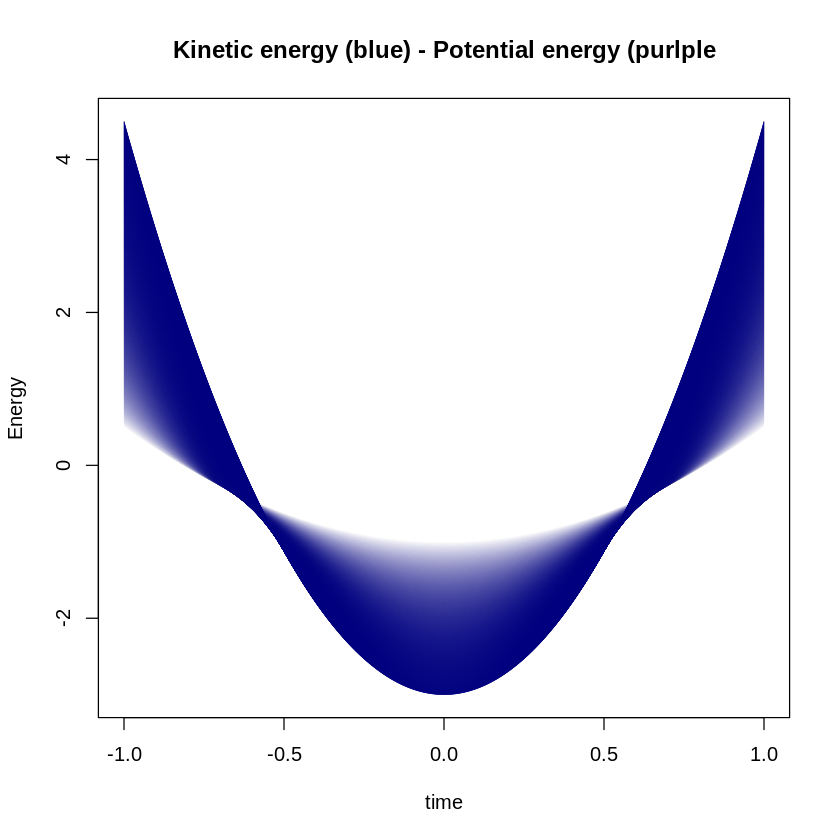

In [ ]:
plot(t, delta[1,], type='l', col='white', lwd=1, ylim=c(min(delta),max(delta)), ylab='Energy', xlab='time', main='Kinetic energy (blue) - Potential energy (purlple')
for (i in 2: (length(eps))) lines(t, delta[i,], col=rgb(0,0,0.5,i/(length(eps))), lwd=.4)